In [1]:
import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [2]:
# Open datasets

data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
data_20 = pd.read_csv(data_dir +'img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv')
data_21 = pd.read_csv(data_dir +'img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv')
data_22 = pd.read_csv(data_dir +'img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv')

data_21 = data_21[data_21['Date']!='2021-08-03']
dfs = [data_20, data_21, data_22]

data_21.Date.unique()


array(['2021-07-07', '2021-07-27', '2021-08-10', '2021-08-17'],
      dtype=object)

In [3]:
data_20.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc'],
      dtype='object')

In [4]:
for df in dfs:
    
    df['GDM_inc'] = 'low'
    df.loc[df['DM_inc']>25,'GDM_inc']= 'high'
    
    df['GDM_sev'] = 'low'
    df.loc[df['DM_severity']>10,'GDM_sev']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.65'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'


# 1. GRVI binned by NDVI - 6 plots

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.716e-01 U_stat=1.565e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.285e-03 U_stat=5.700e+01
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.600e-02 U_stat=9.060e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.750e-02 U_stat=1.588e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


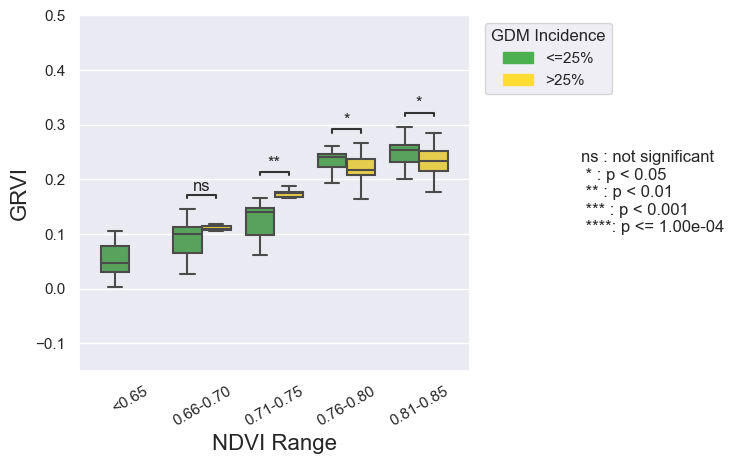

In [5]:
#Incidence 2020

x = "ndvi_group"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]
sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2020", fontsize=20)


plt.tight_layout()
# plt.savefig("fig3_inc_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.200e+01
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.006e-02 U_stat=5.650e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.786e-03 U_stat=9.710e+02


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


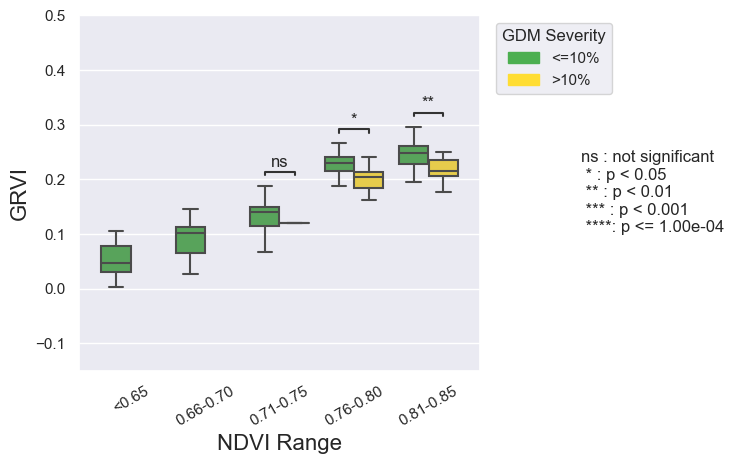

In [6]:
#GRVI Severity 2020

x = "ndvi_group"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
      ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.218e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.317e-01 U_stat=1.100e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.011e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.038e-10 U_stat=1.563e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.593e-01 U_stat=5.900e+01


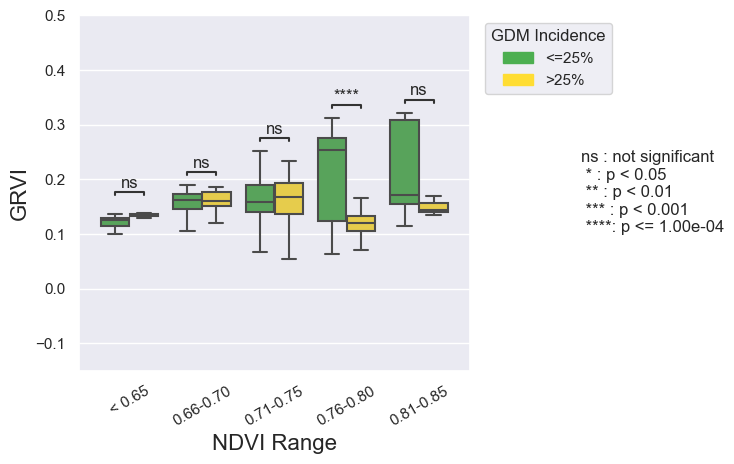

In [7]:
# ARVI Incidence 2021

x = "ndvi_group"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    #((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.081e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.168e-01 U_stat=1.200e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.341e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.768e-08 U_stat=8.575e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


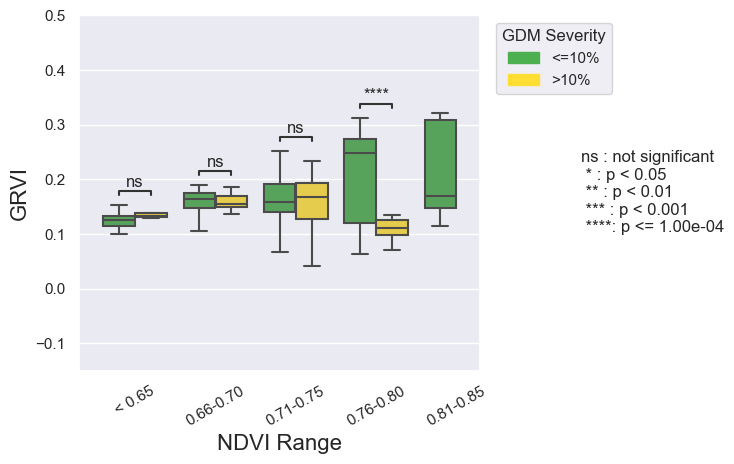

In [8]:
# ARVI Severity 2021
x = "ndvi_group"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.700e+01


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.396e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.060e-01 U_stat=1.068e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00


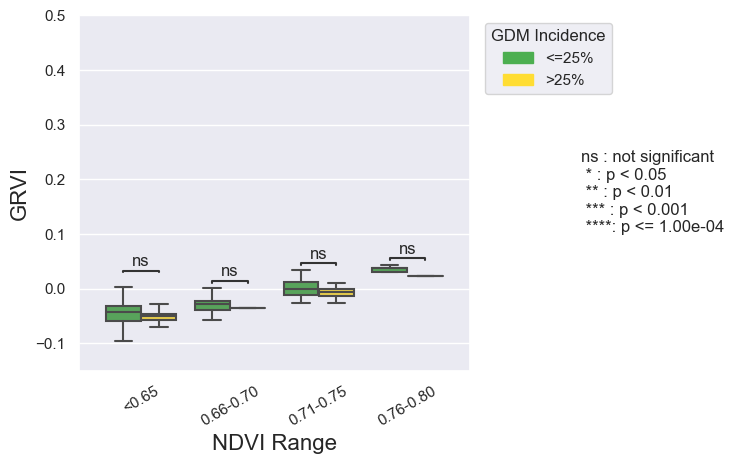

In [9]:
# EVI Incidence 2022

#Incidence 2022
x = "ndvi_group"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'],
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2022_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.540e-01 U_stat=1.827e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.500e+02


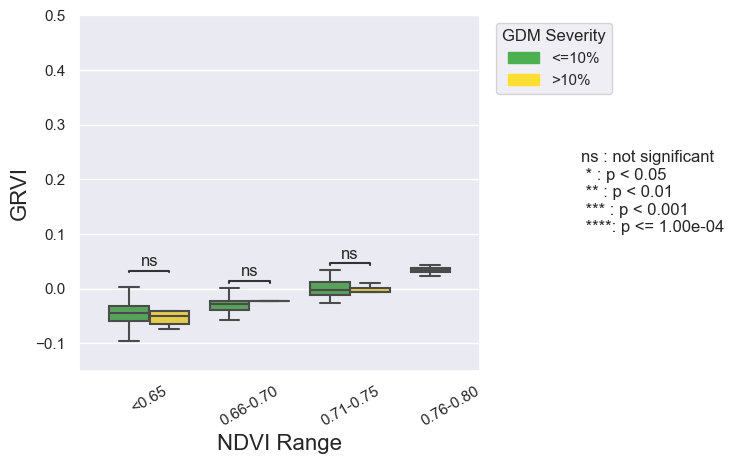

In [10]:
# ARVI Severity 2022
x = "ndvi_group"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()

# plt.savefig("fig3_sev_2022_fullrange.svg")

# 2. GRVI binned by date - 6 plots

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.726e-02 U_stat=4.880e+02
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.379e-04 U_stat=1.237e+03


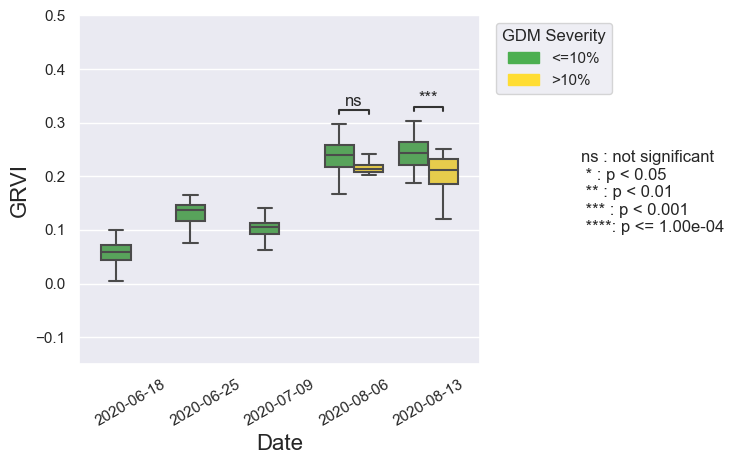

In [11]:
#Severity 2020

x = "Date"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
      ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-07-09_low v.s. 2020-07-09_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.663e-01 U_stat=9.250e+01
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.165e-03 U_stat=1.726e+03
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.863e-03 U_stat=1.700e+03


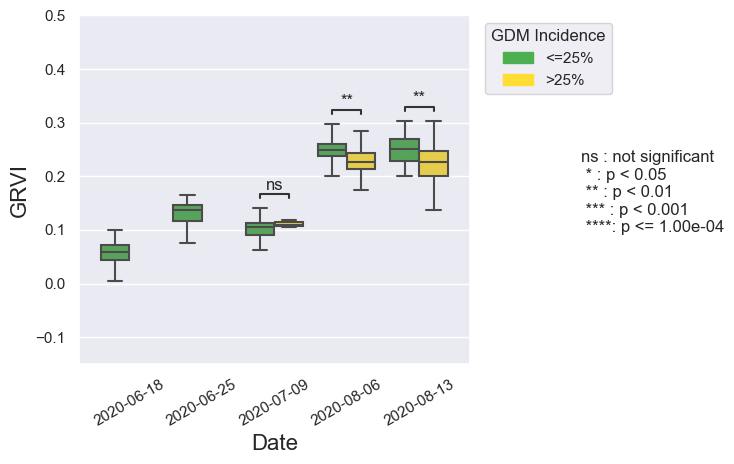

In [12]:
#Inc 2020

x = "Date"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.936e+03
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.940e-02 U_stat=4.625e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.661e+03


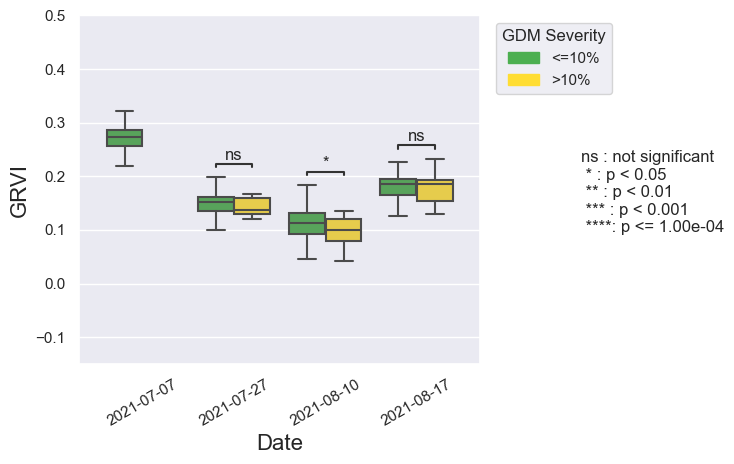

In [13]:
#Severity 2021

x = "Date"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-10',
       '2021-08-17']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.542e+03
2021-07-07_low v.s. 2021-07-07_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.800e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.449e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.703e+03


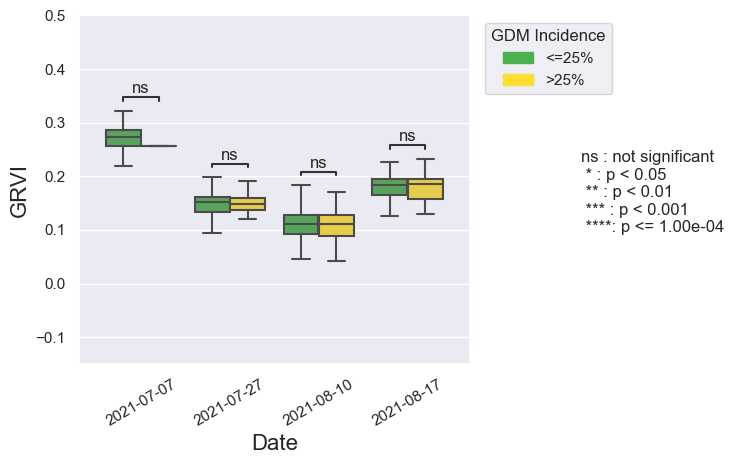

In [14]:
#Inc 2021

x = "Date"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.460e+02
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.510e+02


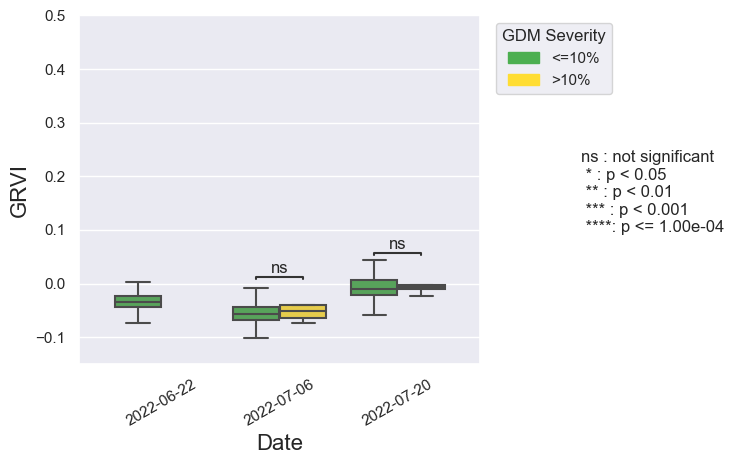

In [15]:
#Severity 2022

x = "Date"
y = "green_red"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.763e-01 U_stat=1.137e+03
2022-06-22_low v.s. 2022-06-22_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.500e-01 U_stat=5.000e+00
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.385e+03


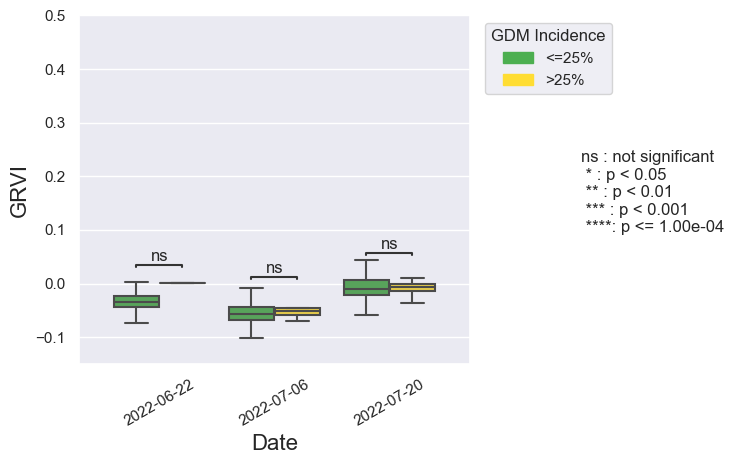

In [17]:
#Inc 2022

x = "Date"
y = "green_red"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
#sns.set(font="Tahoma")

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("GRVI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("GRVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2022.svg")